<a href="https://colab.research.google.com/github/cyongkypranowo/DeepLearning-Diabetes-Disease-Prediction/blob/main/DL_Diabetes_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
plt.style.use('seaborn')

<ipython-input-4-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Business & Data Understanding

**Dataset Description**

Pregnancies : Number of times a woman has been pregnant

Glucose : Plasma Glucose concentration of 2 hours in an oral glucose tolerance test

BloodPressure : Diastollic Blood Pressure (mm hg)

SkinThickness : Triceps skin fold thickness(mm)

Insulin : 2 hour serum insulin(mu U/ml)

BMI : Body Mass Index ((weight in kg/height in m)^2)

Age : Age(years)

DiabetesPedigreeFunction : scores likelihood of diabetes based on family history)

Outcome : 0 (doesn't have diabetes) or 1 (has diabetes)

In [ ]:
# Memuat dataset
df_diabetes = pd.read_csv('pima_diabetes.csv')

In [ ]:
print('Total data:', df_diabetes.shape[0])
print('Total features:', df_diabetes.shape[1])

Total data: 767
Total features: 9


In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df_diabetes = pd.read_csv('./pima_diabetes.csv', names=['preg_times', 'glucose', 'blood_press', 'skin_thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])
df_diabetes.head()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Cleaning & Analysis

In [ ]:
df_diabetes.describe()

,preg_times,glucose,blood_press,skin_thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#identifying duplicates value
df = df_diabetes.drop_duplicates()

In [ ]:
df_diabetes.shape

(768, 9)

In [ ]:
#checking null values, count & disaply sum for every columns. (no null values identified)
df_diabetes.isnull().sum()


preg_times        0
glucose           0
blood_press       0
skin_thickness    0
insulin           0
BMI               0
pedigree          0
age               0
class             0
dtype: int64

In [ ]:
#Checking for 0 values in columns
#no need to check for Pregnancies as it can be 0
print((df_diabetes['glucose'] == 0).sum())
print((df_diabetes['blood_press'] == 0).sum())
print((df_diabetes['skin_thickness'] == 0).sum())
print((df_diabetes['insulin'] == 0).sum())
print((df_diabetes['BMI'] == 0).sum())
print((df_diabetes['pedigree'] == 0).sum())
print((df_diabetes['age'] == 0).sum())

5
35
227
374
11
0
0


It has been identified that some cells have zero values which is not practical medically for example glocuse level, blood pressure. Also, it has been identified that max insulin level is 846 which is too high. Null values and the outliers needs to be treated in the data cleaning process.

<Axes: xlabel='age', ylabel='Count'>

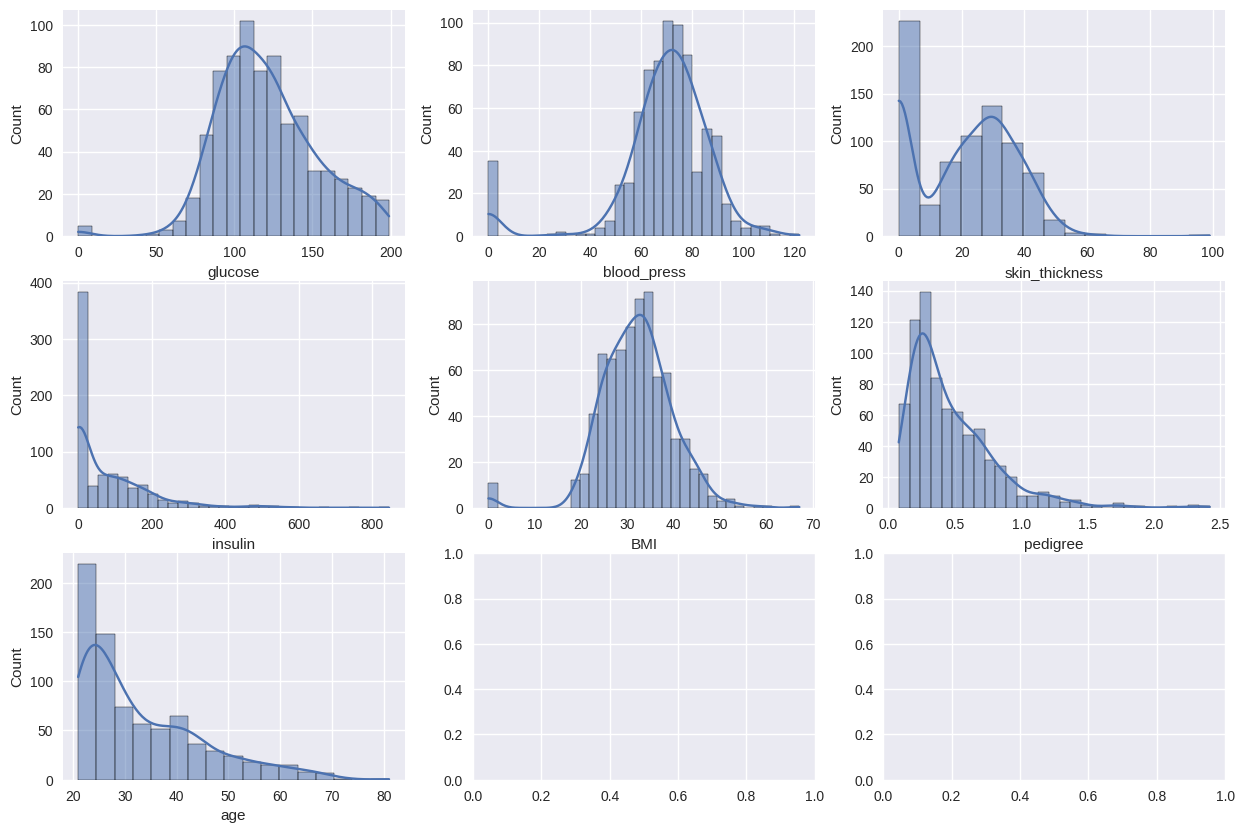

In [ ]:
#checking for the data distribution type to identity impute method for missing values.
fig, axes = plt.subplots(3,3, figsize=(15, 10))

sns.histplot(df_diabetes.glucose, ax= axes[0,0], kde=True)
sns.histplot(df_diabetes.blood_press,  ax= axes[0,1],kde=True)
sns.histplot(df_diabetes.skin_thickness,  ax= axes[0,2], kde=True)
sns.histplot(df_diabetes.insulin,  ax= axes[1,0], kde=True)
sns.histplot(df_diabetes.BMI,  ax= axes[1,1], kde=True)
sns.histplot(df_diabetes.pedigree,  ax= axes[1,2], kde=True)
sns.histplot(df_diabetes.age,  ax= axes[2,0], kde=True)

Since, **Glucose and Blood Pressure** has normal distribution we are using **mean** to impute missing values while **median** will be used **for Insulin, BMI and SkinThickness** as they have skewed distribution.

In [ ]:
df_diabetes['glucose'].replace(0, df_diabetes['glucose'].mean(), inplace=True) #Normal Distribution
df_diabetes['blood_press'].replace(0, df_diabetes['blood_press'].mean(), inplace=True) #Normal Distribution
df_diabetes['insulin'].replace(0, df_diabetes['insulin'].median(), inplace=True) #Skewed Distribution
df_diabetes['BMI'].replace(0, df_diabetes['BMI'].median(), inplace=True) #Skewed Distribution
df_diabetes['skin_thickness'].replace(0, df_diabetes['skin_thickness'].median(), inplace=True) #Skewed Distribution
#pedigree and age has no 0 value

<Axes: xlabel='class', ylabel='count'>

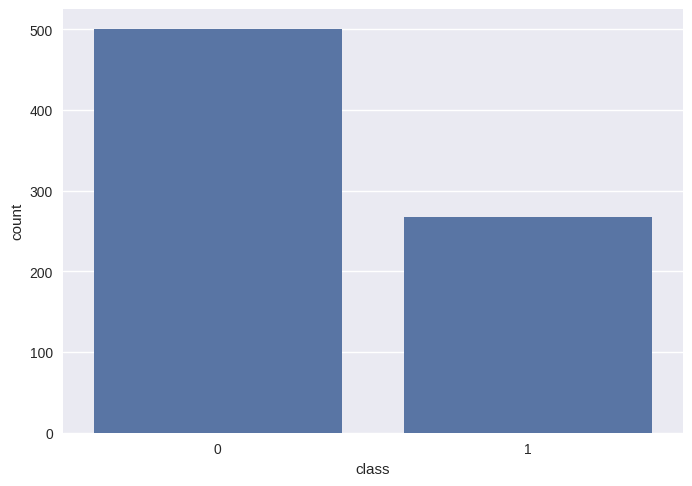

In [ ]:
sns.countplot(x = 'class', data= df_diabetes)

Above visualization shows that the diabetic positive cases are far less then the positive ones, **showing the imbalance in the data**.

<Axes: xlabel='preg_times'>

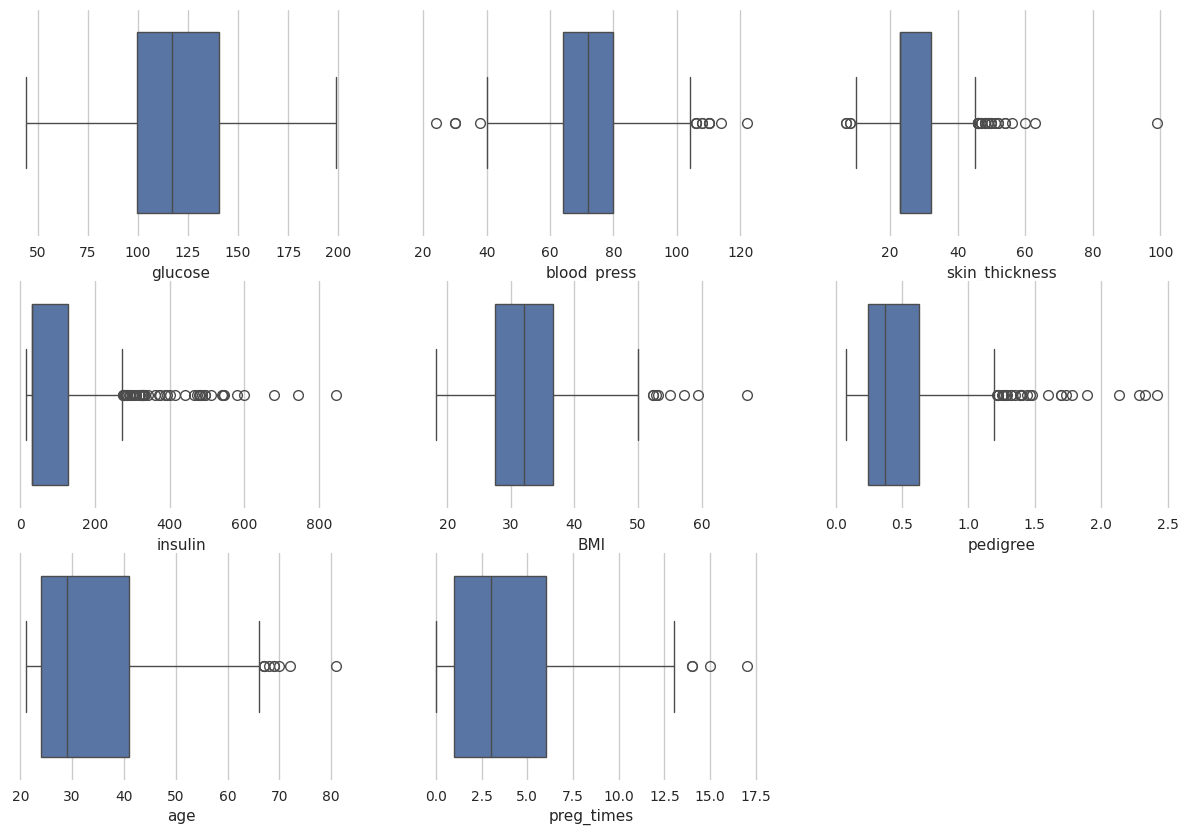

In [ ]:
#Using boxplot to detect the presence of outliers in the data.
plt.figure(figsize=(15,10))
sns.set_style(style='whitegrid')

plt.subplot(3,3,1)
sns.boxplot(x='glucose',data=df_diabetes)

plt.subplot(3,3,2)
sns.boxplot(x='blood_press',data=df_diabetes)

plt.subplot(3,3,3)
sns.boxplot(x='skin_thickness',data=df_diabetes)

plt.subplot(3,3,4)
sns.boxplot(x='insulin',data=df_diabetes)

plt.subplot(3,3,5)
sns.boxplot(x='BMI',data=df_diabetes)

plt.subplot(3,3,6)
sns.boxplot(x='pedigree',data=df_diabetes)

plt.subplot(3,3,7)
sns.boxplot(x='age',data=df_diabetes)

plt.subplot(3,3,8)
sns.boxplot(x='preg_times',data=df_diabetes)

Although we have identified there are **some outliers in the data**, but in this case removing them will cause data loss affecting the correct prediction. So, we will treat the outliers in this case. Treating Ouliers: Using Qunatile Transformer to treat the outliers. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html

Correlation and Feature Selection:

Correlation: Correlation is the frequently used technique in the machine leaning, data science and data analytics. It can help to identify the key problems from the given set of features, which can be helpful when fitting the model later. Pearson's Correlation is used find out the relationship between two quantities. It gives the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

Feature Selection: Feature selection is the process of retrieving a subset of relevant features from the before engineered features. The aim is to remove redundant or irrelevant features to simplify the model, shorten training times, and reduce dimensionality and the chance of over-fitting

<Axes: >

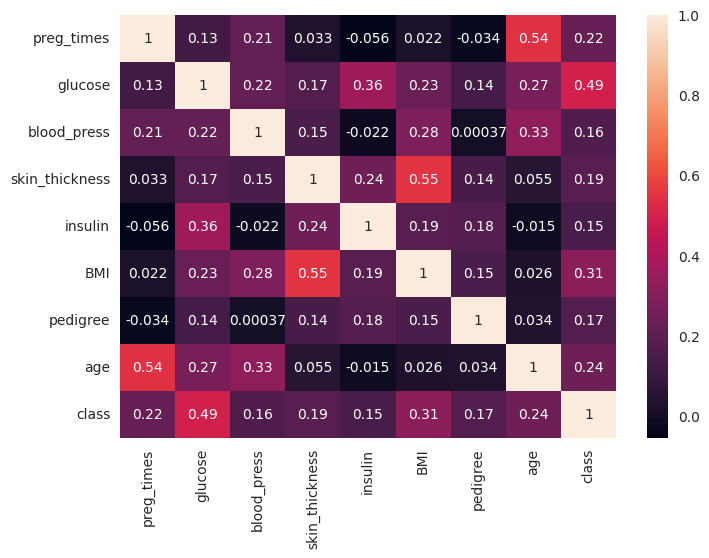

In [ ]:
corelation_format = df_diabetes.corr()
sns.heatmap(corelation_format, annot= True)
#annot: bool or rectangular dataset, optional If True, write the data value in each cell.

The above heatmap shows **Glucose, BMI and Age are highly correlated** with the outcome (class) while Insulin, BloodPressure and DiabetesPedigreeFunction are least correlated. So, we are dropping them.

In [ ]:
#Removing the least correlated columns
df_selected_col = df_diabetes.drop(['insulin', 'blood_press','pedigree'], axis = 'columns')

In [ ]:
from sklearn.preprocessing import QuantileTransformer
rng = np.random.RandomState(0)
x = df_selected_col
qt = QuantileTransformer()
X = qt.fit_transform(x)
df_new=pd.DataFrame(X)
df_new.columns = ['preg_times', 'glucose','skin_thickness','BMI','age','list']
df_new.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


,preg_times,glucose,skin_thickness,BMI,age,list
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<Axes: xlabel='skin_thickness'>

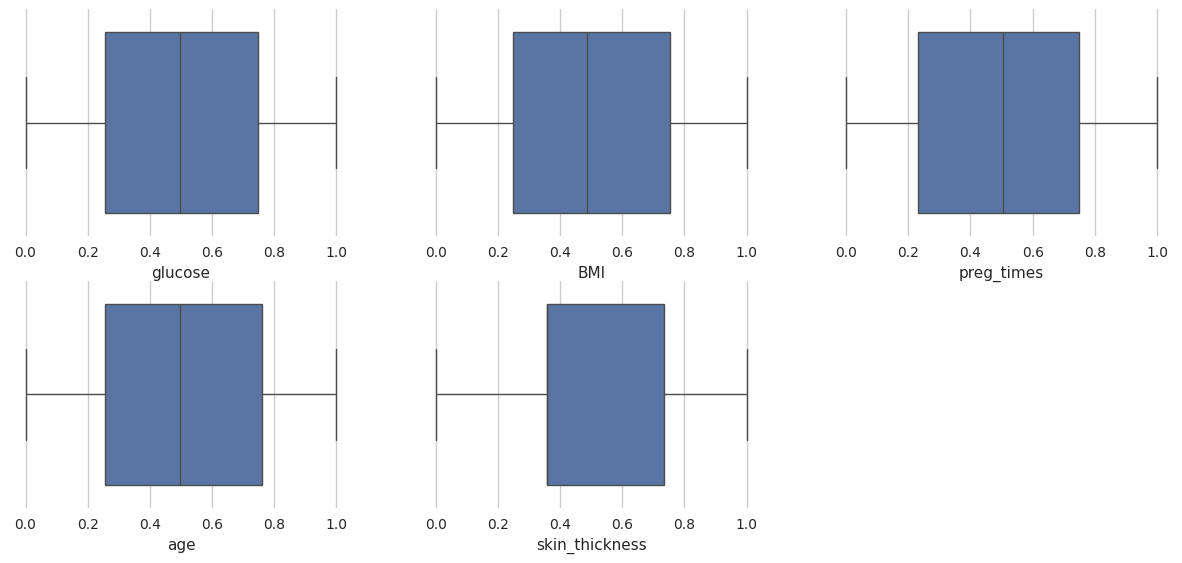

In [ ]:
#Visualizing the treated data

plt.figure(figsize=(15,10))
sns.set_style(style='whitegrid')

plt.subplot(3,3,1)
sns.boxplot(x=df_new['glucose'],data=df_new)

plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)

plt.subplot(3,3,3)
sns.boxplot(x=df_new['preg_times'],data=df_new)

plt.subplot(3,3,4)
sns.boxplot(x=df_new['age'],data=df_new)

plt.subplot(3,3,5)
sns.boxplot(x=df_new['skin_thickness'],data=df_new)

**Now**, after the **data is cleaned**, it's time for to split the train data from the test data.

In [ ]:
#Split data
target_name = 'list'
y = df_new[target_name] #These are the given prediction on the training data
X = df_new.drop(target_name, axis =1) #Dropping outcome columns keeping all the data

In [ ]:
X.head()

,preg_times,glucose,skin_thickness,BMI,age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [ ]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: list, dtype: float64

Splitting train and test data using **Train: 80%, Test: 20% method**.

Train-test split is the method of evaluating the performance of effectiveness of machine learning algorithm. Train: These data are used to feed the machine learning algorithm. Test: These are used to test the machine learning algorithm. These are completely new data that are not used during training the model.

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting 80% train and 20% test data
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [ ]:
X_train.shape, Y_train.shape

((614, 5), (614,))

In [ ]:
x_test.shape, y_test.shape

((154, 5), (154,))

# Data Modeling &  Architect Experiment

## Narrow Shallow Model
(Memiliki sedikit lapisan dan sedikit neuron per lapisan)

In [ ]:
model_ns = Sequential()
model_ns.add(Dense(units=2, activation='relu', input_shape=(X_train.shape[1],)))
model_ns.add(Dense(units=1, activation='sigmoid'))

model_ns.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model_ns.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)
model_ns.summary()

loss, accuracy = model_ns.evaluate(x_test, y_test)

Epoch 1/100
16/16 [==============================] - 1s 17ms/step - loss: 0.7070 - accuracy: 0.4257 - val_loss: 0.7106 - val_accuracy: 0.4065
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6999 - accuracy: 0.4664 - val_loss: 0.7018 - val_accuracy: 0.4309
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.5234 - val_loss: 0.6943 - val_accuracy: 0.5122
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6891 - accuracy: 0.5866 - val_loss: 0.6870 - val_accuracy: 0.6098
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.6232 - val_loss: 0.6811 - val_accuracy: 0.6341
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.6212 - val_loss: 0.6757 - val_accuracy: 0.6504
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.6375 - val_loss: 0.6716 - val_accuracy: 0.6667
Epoch 8/100


## Narrow Wide Model
(Memiliki sedikit lapisan tetapi dengan lebih banyak neuron per lapisan)

In [ ]:
model_nw = Sequential()
model_nw.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model_nw.add(Dense(units=1, activation='sigmoid'))

model_nw.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model_nw.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)
model_nw.summary()

loss, accuracy = model_nw.evaluate(x_test, y_test)

Epoch 1/100
16/16 [==============================] - 1s 32ms/step - loss: 0.6844 - accuracy: 0.6293 - val_loss: 0.6645 - val_accuracy: 0.6829
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6727 - accuracy: 0.6293 - val_loss: 0.6522 - val_accuracy: 0.6829
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6590 - accuracy: 0.6314 - val_loss: 0.6391 - val_accuracy: 0.6829
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6467 - accuracy: 0.6334 - val_loss: 0.6253 - val_accuracy: 0.6748
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6320 - accuracy: 0.6517 - val_loss: 0.6143 - val_accuracy: 0.7073
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6181 - accuracy: 0.6762 - val_loss: 0.5968 - val_accuracy: 0.7073
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6021 - accuracy: 0.6843 - val_loss: 0.5823 - val_accuracy: 0.7236
Epoch 8/100


## Narrow Wide Model
(Memiliki sedikit lapisan tetapi dengan lebih banyak neuron per lapisan)

In [ ]:
model_nw = Sequential()
model_nw.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model_nw.add(Dense(units=1, activation='sigmoid'))

model_nw.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model_nw.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)
model_nw.summary()

loss, accuracy = model_nw.evaluate(x_test, y_test)

Epoch 1/100
16/16 [==============================] - 1s 14ms/step - loss: 0.6906 - accuracy: 0.5316 - val_loss: 0.6708 - val_accuracy: 0.6829
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6732 - accuracy: 0.6293 - val_loss: 0.6531 - val_accuracy: 0.6829
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6602 - accuracy: 0.6293 - val_loss: 0.6409 - val_accuracy: 0.6829
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6461 - accuracy: 0.6293 - val_loss: 0.6266 - val_accuracy: 0.6829
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6311 - accuracy: 0.6436 - val_loss: 0.6114 - val_accuracy: 0.6911
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6158 - accuracy: 0.6701 - val_loss: 0.5972 - val_accuracy: 0.7480
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6020 - accuracy: 0.7291 - val_loss: 0.5828 - val_accuracy: 0.7480
Epoch 8/100


## Deep And Shallow
(Memiliki sedikit lapisan tetapi dengan lebih banyak neuron per lapisan)

In [ ]:
model_ds = Sequential()
model_ds.add(Dense(units=4, activation='relu', input_shape=(X_train.shape[1],)))
model_ds.add(Dense(units=4, activation='relu', input_shape=(X_train.shape[1],)))
model_ds.add(Dense(units=2, activation='relu', input_shape=(X_train.shape[1],)))
model_ds.add(Dense(units=2, activation='relu', input_shape=(X_train.shape[1],)))
model_ds.add(Dense(units=1, activation='sigmoid'))

model_ds.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model_ds.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)
model_ds.summary()

loss, accuracy = model_ds.evaluate(x_test, y_test)

Epoch 1/100
16/16 [==============================] - 1s 16ms/step - loss: 0.7226 - accuracy: 0.6293 - val_loss: 0.6846 - val_accuracy: 0.6829
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7123 - accuracy: 0.6293 - val_loss: 0.6823 - val_accuracy: 0.6829
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7061 - accuracy: 0.6293 - val_loss: 0.6800 - val_accuracy: 0.6829
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7020 - accuracy: 0.6293 - val_loss: 0.6778 - val_accuracy: 0.6829
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6978 - accuracy: 0.6293 - val_loss: 0.6749 - val_accuracy: 0.6829
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6941 - accuracy: 0.6293 - val_loss: 0.6716 - val_accuracy: 0.6829
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.6293 - val_loss: 0.6694 - val_accuracy: 0.6829
Epoch 8/100


## Deep And Wide
(Memiliki kombinasi banyak lapisan dan banyak neuron per lapisan)

In [ ]:
model_dw = Sequential()
model_dw.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))
model_dw.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model_dw.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))
model_dw.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))
model_dw.add(Dense(units=8, activation='relu', input_shape=(X_train.shape[1],)))
model_dw.add(Dense(units=4, activation='relu', input_shape=(X_train.shape[1],)))
model_dw.add(Dense(units=2, activation='relu', input_shape=(X_train.shape[1],)))
model_dw.add(Dense(units=1, activation='sigmoid'))

model_dw.compile(tf.keras.optimizer.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_dw.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)
model_dw.summary()

loss, accuracy = model_dw.evaluate(x_test, y_test)

NameError: name 'tf' is not defined

## Evaluation

In [ ]:
#Narrow Shallow
loss, accuracy = model_ns.evaluate(x_test, y_test)
print(f'Narrow Shallow loss: {loss}, accuracy: {accuracy}')

5/5 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7792
Narrow Shallow loss: 0.49103620648384094, accuracy: 0.7792207598686218


In [ ]:
#Narrow Wide
loss, accuracy = model_nw.evaluate(x_test, y_test)
print(f'Narrow Wide loss: {loss}, accuracy: {accuracy}')

5/5 [==============================] - 0s 5ms/step - loss: 0.4378 - accuracy: 0.7987
Narrow Wide loss: 0.43777430057525635, accuracy: 0.798701286315918


In [ ]:
#Deep and Shallow
loss, accuracy = model_ds.evaluate(x_test, y_test)
print(f'Deep and Shallow loss: {loss}, accuracy: {accuracy}')

5/5 [==============================] - 0s 4ms/step - loss: 0.4521 - accuracy: 0.7792
Deep and Shallow loss: 0.45210111141204834, accuracy: 0.7792207598686218


In [ ]:
#Deep and Wide
loss, accuracy = model_dw.evaluate(x_test, y_test)
print(f'Deep and Wide loss: {loss}, accuracy: {accuracy}')

## Hyperparameter Tuning Experiment

### Random Search

In [ ]:
#Narrow Shallow
class NarrowShallowModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units_1', min_value=4, max_value=32, step=4),
                        activation='relu', input_shape=(self.input_shape,)))
        model.add(Dense(units=hp.Int('units_2', min_value=4, max_value=16, step=4),
                        activation='relu'))
        # Lapisan output
        model.add(Dense(1, activation='sigmoid'))

        # Kompilasi model
        model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model


# Definisikan model hypermodel
hypermodel = NarrowShallowModel(input_shape=X_train.shape[1])

# Setup RandomSearch tuner
ns_tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner',
    project_name='narrow_shallow_tuning'
)

ns_tuner.search(X_train, Y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32)
ns_tuner_results = ns_tuner.results_summary()
best_ns_param = ns_tuner.get_best_hyperparameters(num_trials=1)[0]

cp = ModelCheckpoint('TheWoz_NarrowShallow.h5', monitor='val_loss', save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch', verbose=1)

best_ns_model = ns_tuner.hypermodel.build(best_ns_param)
best_ns_model = best_ns_model.fit(X_train, Y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32, callbacks=[cp])


NameError: name 'HyperModel' is not defined

## Model Evaluation

#Model Performace Analysis

5/5 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       107
         1.0       0.68      0.53      0.60        47

    accuracy                           0.78       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.77      0.78      0.77       154



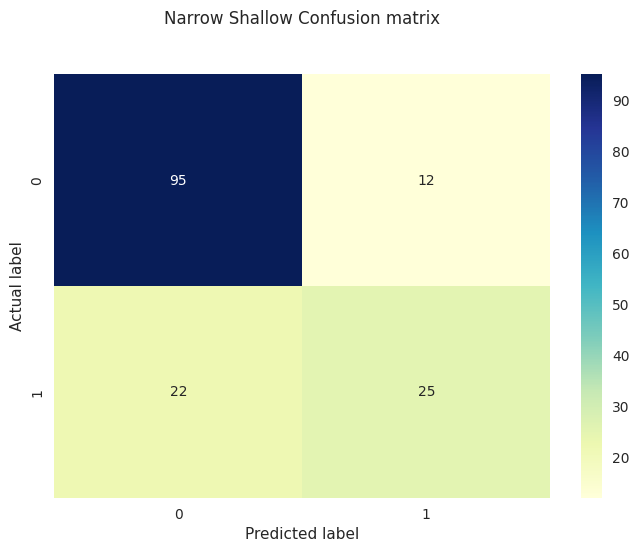

In [ ]:
#Narrow Shallow
from sklearn.metrics import confusion_matrix, classification_report

ns_prediction = model_ns.predict(x_test)
cnf_matrix = confusion_matrix(y_test, np.round(ns_prediction))

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Narrow Shallow Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(classification_report(y_test, np.round(ns_prediction)))